In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm

In [2]:
df = pd.read_csv("privatepropertyng5.csv")
df.head()

,Unnamed: 0,Title,Price,Location,Beds,Baths,Description,Garage
0,0,Exquisite And Well Maintained 3 & 4 Bedroom Ap...,"N25,000,000 per year","Ocean Parade, Banana Island, Banana Island, ...",3,5,3 Bedroom Flat & Apartment,0
1,1,Brand new exquisite 4 Bedroom duplex for letti...,"N2,500,000 per year","Ogudu Lagos , Ogudu G.R.A, Ketu",4,5,4 Bedroom Duplex,0
2,2,1 bedroom self contain for rent,"N2,300,000 per year","Oniru, Victoria Island",1,1,Flat & Apartment,1
3,3,4 bedroom terrace duplex for rent!!,"N3,000,000 per year","Ikota, Lekki",4,4,4 Bedroom Terrace,2
4,4,Well Finished 4 Bedroom Town House With Bq,"N5,500,000 per year","Off Audu Epkeka, Lekki Phase 1, Lekki",4,4,4 Bedroom Townhouse,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 8 columns):
Unnamed: 0     2700 non-null int64
Title          2700 non-null object
Price          2700 non-null object
Location       2700 non-null object
Beds           2700 non-null int64
Baths          2700 non-null int64
Description    2700 non-null object
Garage         2700 non-null int64
dtypes: int64(4), object(4)
memory usage: 168.8+ KB


In [5]:
df.describe(include="all")

,Unnamed: 0,Title,Price,Location,Beds,Baths,Description,Garage
count,2700.000000,2700,2700,2700,2.700000e+03,2700.000000,2700,2700.000000
unique,NaN,2198,235,1039,NaN,NaN,74,NaN
top,NaN,3 Bedroom Apartment,"N3,500,000 per year","Lekki Phase 1, Lekki",NaN,NaN,3 Bedroom Flat & Apartment,NaN
freq,NaN,25,282,150,NaN,NaN,714,NaN
mean,1349.500000,NaN,NaN,NaN,2.225404e+03,3.334074,NaN,0.553333
std,779.567188,NaN,NaN,NaN,8.276132e+04,1.776578,NaN,1.597669
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,0.000000
25%,674.750000,NaN,NaN,NaN,3.000000e+00,3.000000,NaN,0.000000
50%,1349.500000,NaN,NaN,NaN,3.000000e+00,4.000000,NaN,0.000000
75%,2024.250000,NaN,NaN,NaN,4.000000e+00,4.000000,NaN,0.000000


# DATA PREPROCESSING ....

Based on the stats observed in the dataframe above, we will be dropping columns: 'Unnamed' because it is just index from excel, 'title' ,'location' because of the number of unique values in comparison with the total number of entries in the dataset!!


In [3]:
new_df = df.drop(columns=["Unnamed: 0","Title","Location"],axis=1)

In [7]:
new_df.head()

,Price,Beds,Baths,Description,Garage
0,"N25,000,000 per year",3,5,3 Bedroom Flat & Apartment,0
1,"N2,500,000 per year",4,5,4 Bedroom Duplex,0
2,"N2,300,000 per year",1,1,Flat & Apartment,1
3,"N3,000,000 per year",4,4,4 Bedroom Terrace,2
4,"N5,500,000 per year",4,4,4 Bedroom Townhouse,0


The dependent variable column i.e price column needs to be transformed..i.e the figures must be extracted!!
Analysis of the price column showed that the price values were ending with " per year", " /m2", " per month". Values with "per year" were extracted directly..values with "/m2" and "per month" i.e per month were multiplied by 12 to get value for a year

In [17]:
#cleaning function for the price column
def change_y(val):
    new_val =0 
    #a default value of zero was placed so that we can check for any value not caught by our function and then 
    #trace them in the table to the original price column to see if there was any string pattern we didnt catch'''
    index = val.find(" per year")
    if index != -1:
        new_val = val[1:index].replace(",","")
        new_val = int(new_val)
    else:
        if val[-4:] == " /m2":
            index = val.find(" /m2")
            if index != -1:
                new_val = val[1:index].replace(",","")
                new_val = int(new_val)
                new_val = new_val *12
        else:
            index = val.find(" per month")
            if index != -1:
                new_val = val[1:index].replace(",","")
                new_val = int(new_val)
                new_val = new_val *12
    return int(new_val)    


In [18]:
new_df["Real_Price"] = new_df["Price"].apply(change_y) #applying the cleaning function to the price column

In [19]:
new_df.describe(include="all",percentiles = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.994])

,Price,Beds,Baths,Description,Garage,Real_Price
count,2700,2.700000e+03,2700.000000,2700,2700.000000,2.700000e+03
unique,235,NaN,NaN,74,NaN,NaN
top,"N3,500,000 per year",NaN,NaN,3 Bedroom Flat & Apartment,NaN,NaN
freq,282,NaN,NaN,714,NaN,NaN
mean,NaN,2.225404e+03,3.334074,NaN,0.553333,9.820131e+06
std,NaN,8.276132e+04,1.776578,NaN,1.597669,6.813070e+07
min,NaN,0.000000e+00,0.000000,NaN,0.000000,1.000000e+00
1%,NaN,0.000000e+00,0.000000,NaN,0.000000,9.486000e+04
2%,NaN,0.000000e+00,0.000000,NaN,0.000000,4.000000e+05
3%,NaN,0.000000e+00,0.000000,NaN,0.000000,7.000000e+05


Observing the dataframe above, outliers can be detected in the columns above the 99.4th percentile and before the 10th pecentile in real_price ..They will be removed!!! 

In [20]:
newer_df = new_df.copy()
q = newer_df["Real_Price"].quantile(0.99)
newer_df2 = newer_df[newer_df["Real_Price"]<q]
q = newer_df2["Real_Price"].quantile(0.02)
newer_df3 = newer_df2[newer_df2["Real_Price"]>q]
q=newer_df3["Baths"].quantile(0.99)
newer_df4 = newer_df3[newer_df3["Baths"]<q]

In [21]:
q = newer_df4["Beds"].quantile(0.99)
newer_df5 = newer_df4[newer_df4["Beds"]<q]

In [79]:
newer_df5.describe(include="all",percentiles = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,0.99,0.994])

,Price,Beds,Baths,Description,Garage,Real_Price
count,2313,2313.000000,2313.000000,2313,2313.000000,2.313000e+03
unique,161,NaN,NaN,41,NaN,NaN
top,"N3,500,000 per year",NaN,NaN,3 Bedroom Flat & Apartment,NaN,NaN
freq,262,NaN,NaN,707,NaN,NaN
mean,NaN,2.983571,3.123649,NaN,0.493299,6.489733e+06
std,NaN,1.186606,1.290878,NaN,1.160954,6.624094e+06
min,NaN,0.000000,0.000000,NaN,0.000000,4.200000e+05
10%,NaN,1.000000,1.000000,NaN,0.000000,1.820000e+06
20%,NaN,2.000000,2.000000,NaN,0.000000,2.700000e+06
30%,NaN,3.000000,3.000000,NaN,0.000000,3.000000e+06


In [85]:
newer_df5["log_price"] = newer_df5["Real_Price"].apply(np.log) #log price is abetter representation of price because of the large and 
#relatively far apart figures

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
newer_df5.head()

,Price,Beds,Baths,Description,Garage,Real_Price,log_price
0,"N25,000,000 per year",3,5,3 Bedroom Flat & Apartment,0,25000000,17.034386
1,"N2,500,000 per year",4,5,4 Bedroom Duplex,0,2500000,14.731801
2,"N2,300,000 per year",1,1,Flat & Apartment,1,2300000,14.648420
3,"N3,000,000 per year",4,4,4 Bedroom Terrace,2,3000000,14.914123
4,"N5,500,000 per year",4,4,4 Bedroom Townhouse,0,5500000,15.520259


The next step would be to get the dependent and independent variables..

In [146]:
x = newer_df5.iloc[:,[1,2,3,4]] #independent variables
y= newer_df5.iloc[:,-1] #dependent variable

Next step will be to convert the categorical column to dummies

In [147]:
x_dum = pd.get_dummies(x,drop_first = True)

Next step will be to split the dataset into train and test

In [148]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test = train_test_split(x_dum,y,test_size = 0.2, random_state = 42)

NOW, BASED ON MY CURRENT KNOWLEDGE, THIS IS A REGRESSION PROBLEM, SO WE WILL APPLY DIFFERENT REGRESSION ALGORITHMS


CHECKING FOR NORMAL DISTRIBUTION IN THE VARIABLES

Let us see distplot for the DEPENDENT variable.

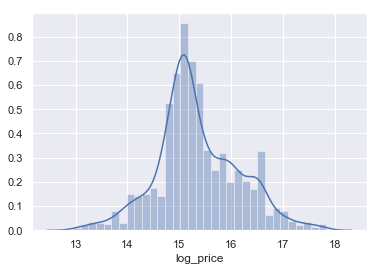

In [94]:
sns.distplot(newer_df5["log_price"])

And...yeah.... log(price) is normally distributed

THE INDEPENDENT VARIABLES

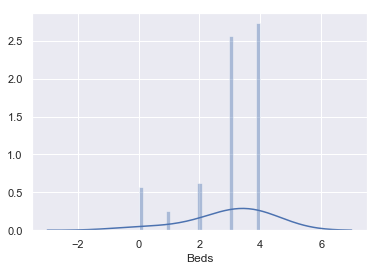

In [105]:
sns.distplot(newer_df5["Beds"],kde_kws = {"bw":1})

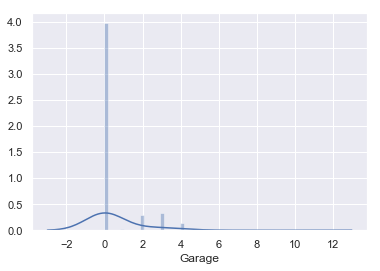

In [106]:
sns.distplot(newer_df5["Garage"],kde_kws = {"bw":1})

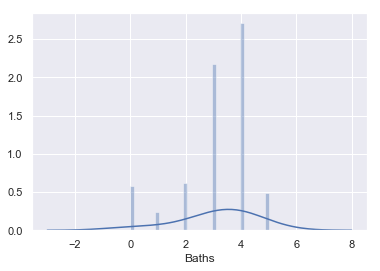

In [108]:
sns.distplot(newer_df5["Baths"],kde_kws = {"bw":1})

NORMAL DISTRIBUTION WAS OBSERVED IN THE INDEPENDENT VARIABLES HISTOGRAM PLOTS ABOVE

NOTE: ALPHA LEVEL OF SIGNIFICANCE IS SET TO 0.05

# LINEAR REGRESSION

NOW LET'S CHECK FOR LINEARITY

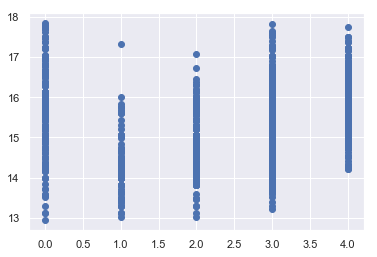

In [114]:
plt.scatter(newer_df5["Beds"],newer_df5["log_price"])

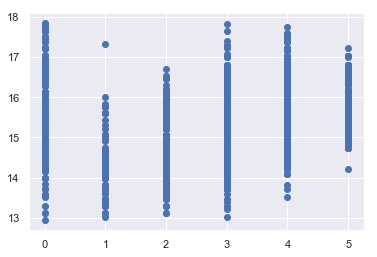

In [115]:
plt.scatter(newer_df5["Baths"],newer_df5["log_price"])

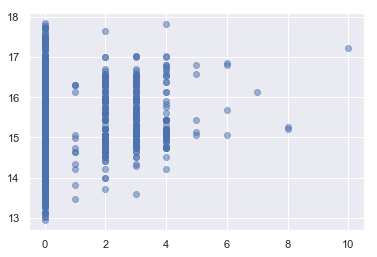

In [117]:
plt.scatter(newer_df5["Garage"],newer_df5["log_price"],alpha=0.5)

BASED ON THE PLOTS ABOVE, WE CAN SAY THAT THERE EXISTS, A DEGREE OF LINEARITY BETWEEN THE DEPENDENT AND INDEPENDENT VARIABLES. FOR BEDS AND BATHS, THE PLOTS WERE SIMILAR. FROM THE VALUE OF 1, THE HIGHEST POINTS ON THE DISCRETE VERTICAL LINES OF POINTS WAS INCREASING, DIFFERENCE IN THE LOWEST POINT WASN'T SIGNIFICANT UNTIL THE LAST VERTICAL LINE OF POINTS,PROBABLY INDICATING THAT HIGHER NUMBERS OF BATHS OR BEDS BETWEEN 1 AND 3 I.E 3 DOES NOT NECESSARILY MEAN THE PRICE CAN NOT TOUCH DOWN TO A LOW POINT. FOR GARAGE, THE LINEARITY IS CLEARER THOUGH MOST OF THE VALUES APPEAR TO BE ZERO AS SHOWN BY THE ALPHA PARAMETER.

THE SECOND CHECK IS NO ENDOGENEITY OF REGRESSORS. OUR RESULT WILL GIVE US A HINT ON THAT.I.E WHETHER WE LEFT OUT AN IMPORTANT VARIABLE THAT GOT INCLUDED IN THE ERROR.

THE THIRD CHECK IS NORMALITY, ZERO MEAN AND HOMOSCEDASTICITY.. NORMALITY WILL BE CHECKED AFTER PREDICTING VALUES WITH OUR TRAINED MODEL I.E DISTPLOT OF (TRUE-Y) - (PREDICTED-Y) . HETEROSCEDASTICITY WAS PREVENTED BY TAKING THE LOG OF THE DEPENDENT VARIABLE. ZERO MEAN OF ERROR TERMS WOULD BE ENSURED BY INCLUDING AN INTERCEPT.SKLEARN DOES THIS BY DEFAULT.


THE 4TH CHECK IS NO AUTOCORRELATION WHICH IS NOT A PROBLEM IN THIS DATASET BECAUSE IT REFLECTS A PARTICULAR STATE IN TIME I.E IT IS NOT PANEL OR TIME SERIES DATA. IT IS CROSS-SECTIONAL DATA. SECTIONS OF THE DATA DO NOT HAVE DEPENDENCIES ON THEMSELVES

THE 5TH CHECK IS MULTICOLLINEARITY

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
variables = newer_df5[["Beds","Baths","Garage"]]

In [136]:
vif = pd.DataFrame()

In [137]:
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

In [138]:
vif["features"] = variables.columns

In [139]:
vif

,VIF,features
0,66.000047,Beds
1,65.424518,Baths
2,1.227877,Garage


In [140]:
newer_df5.corr()

,Beds,Baths,Garage,Real_Price,log_price
Beds,1.000000,0.946141,0.192071,-0.068824,0.104169
Baths,0.946141,1.000000,0.167370,-0.039632,0.129686
Garage,0.192071,0.167370,1.000000,0.042914,0.082015
Real_Price,-0.068824,-0.039632,0.042914,1.000000,0.857617
log_price,0.104169,0.129686,0.082015,0.857617,1.000000


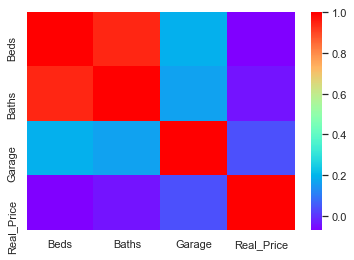

In [23]:
sns.heatmap(newer_df5.corr(),cmap="rainbow")

VIF ABOVE 5 IS CONSIDERED HIGH......MAXIMUM CORRELATION VALUE IS 1

BOTH THE VIF TABLE AND CORRELATION MATRIX SHOW A HIGH CORRELATION EXISTS BETWEEN BEDS AND BATHS MEANING WE ARE TO DROP ONE. BASED ON THE FACT THAT BEDS HAS A HIGHER VIF AND A LESSER CORRELATION WITH THE DEPENDENT VARIABLE...IT'LL PROLLY BE A GOOD IDEA TO TAKE OUT THE BEDS..BUT LET'S SEE HOW IT WILL FAIR IN THE REGRESSION FITTING..

LET'S SEE HOW THE BEDS VARIABLE WILL FAIR IN THE REGRESSION FITTING..

IN OTHER WORDS WE WILL BE IMPLEMENTING THE BACKWARD ELIMINATION METHOD FOR MODEL SELECTION

In [142]:
from sklearn.linear_model import LinearRegression

In [151]:
linear_regressor = LinearRegression()

In [152]:
linear_regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
linear_regressor.score(x_train,y_train)

0.2436554318676931

For a more detailed and outlined view we will use statsmodels

In [156]:
from statsmodels.api import OLS

In [167]:
x_train_const = sm.add_constant(x_train)# THIS ENSURES ZERO MEAN OF ERROR TERMS

In [168]:
result1 = sm.OLS(y_train,x_train_const).fit()

In [169]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     13.86
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.05e-81
Time:                        22:49:02   Log-Likelihood:                -1934.6
No. Observations:                1850   AIC:                             3955.
Df Residuals:                    1807   BIC:                             4193.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        13.6116      2.145      6.346      0.000       9.405      17.818
Beds                                          0.2229      0.706      0.316      0.752      -1.161       1.607
Baths                                         0.2046      0.039      5.280      0.000       0.129       0.281
Garage                                        0.0405      0.014      2.827      0.005       0.012       0.069
Description_ 3 Bedroom Office                 0.1031      0.805      0.128      0.898      -1.475       1.682
Description_ 4 Bedroom Duplex                -0.1673      0.905     -0.185      0.853      -1.941       1.607
Description_ 4 Bedroom Flat & Apartment       0.8977      1.069      0.840      0.401      -1.199       2.994
Description_ 4 Bedroom Terrace            -9.561e-15   8.04e-15     -1.189      0.235   -2.53e-14    6.21e-15
Description_2 Bedroom Bungalow               -0.6322      0.904     -0.699      0.485      -2.406       1.142
Description_2 Bedroom Commercial Property     0.0421      1.068      0.039      0.969      -2.052       2.136
Description_2 Bedroom Duplex                  0.1327      0.947      0.140      0.889      -1.725       1.991
Description_2 Bedroom Flat & Apartment        0.4044      0.811      0.499      0.618      -1.186       1.995
Description_2 Bedroom House                   0.0860      0.904      0.095      0.924      -1.687       1.859
Description_2 Bedroom Office                 -0.4688      1.068     -0.439      0.661      -2.563       1.625
Description_2 Bedroom Terrace                 0.2820      0.904      0.312      0.755      -1.491       2.055
Description_3 Bedroom Bungalow               -0.7822      0.532     -1.470      0.142      -1.826       0.262
Description_3 Bedroom Commercial Property     1.0507      0.533      1.970      0.049       0.005       2.097
Description_3 Bedroom Duplex                  0.3164      0.412      0.767      0.443      -0.492       1.125
Description_3 Bedroom Flat & Apartment        0.4387      0.403      1.088      0.277      -0.352       1.230
Description_3 Bedroom Flat & Apartment
       0.2642      0.532      0.497      0.620      -0.779       1.308
Description_3 Bedroom House                   0.5851      0.450      1.301      0.194      -0.297       1.467
Description_3 Bedroom Office                  0.6752      0.532      1.269      0.205      -0.368       1.719
Description_3 Bedroom Terrace                 0.5098      0.416      1.226      0.220      -0.306       1.325
Description_3 Bedroom Townhouse               1.1601      0.636      1.824      0.068      -0.087       2.408
Description_4 Bedroom Bungalow               -0.4420      0.948     -0.466      0.641      -2.302       1.418
Des

FROM THE TABLE ABOVE, IT CAN BE OBSERVED THAT P-VALUE FOR THE 'BEDS' VARIABLE IS QUITE HIGH ..UP TO 0.752 ABOVE THE ALPHA LEVEL OF SIGNIFICANCE IN THIS CASE 0.O5..DEPICTING THAT IT IS A USELESS VARIABLE. NOW WE HAVE 3 GOOD REASONS TO ELIMINATE IT: HIGH VIF..LESSER CORRELATION WITH THE DEPENDENT VARIABLE IN COMPARISON WITH THE 'BATHS' VARIABLE AND OF COURSE A RELATIVELY HIGH P-VALUE!

IT WOULD BE PREFERABLE TO GO BACK AND TAKE THE DATAFRAME IN WHICH WE DID NOT REMOVE OUTLIERS IN THE BEDS TABLE AS THIS WOULD HAVE REDUCED SOME OF THE AVAILABLE VALUES IN THE USEFUL COLUMNS..IN THIS CASE THAT WOULD BE 'NEWER_DF4'

In [170]:
newer_df4.head() #dataframe before losing data to the removal of outliers in the useless "beds" column

,Price,Beds,Baths,Description,Garage,Real_Price
0,"N25,000,000 per year",3,5,3 Bedroom Flat & Apartment,0,25000000
1,"N2,500,000 per year",4,5,4 Bedroom Duplex,0,2500000
2,"N2,300,000 per year",1,1,Flat & Apartment,1,2300000
3,"N3,000,000 per year",4,4,4 Bedroom Terrace,2,3000000
4,"N5,500,000 per year",4,4,4 Bedroom Townhouse,0,5500000


In [171]:
newer_df4["log_price"] = newer_df4["Real_Price"].apply(np.log) #log price is abetter representation of price because of the large and 
#relatively far apart figures

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
newer_df4.head()

,Price,Beds,Baths,Description,Garage,Real_Price,log_price
0,"N25,000,000 per year",3,5,3 Bedroom Flat & Apartment,0,25000000,17.034386
1,"N2,500,000 per year",4,5,4 Bedroom Duplex,0,2500000,14.731801
2,"N2,300,000 per year",1,1,Flat & Apartment,1,2300000,14.648420
3,"N3,000,000 per year",4,4,4 Bedroom Terrace,2,3000000,14.914123
4,"N5,500,000 per year",4,4,4 Bedroom Townhouse,0,5500000,15.520259


In [173]:
x1=newer_df4.iloc[:,[2,3,4]]
y1=newer_df4.iloc[:,-1]

In [175]:
x1_dum = pd.get_dummies(x1,drop_first = True)

In [176]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1_dum,y1,test_size =0.2,random_state =42)

In [189]:
linear_regressor1 = LinearRegression()

In [190]:
linear_regressor1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [191]:
linear_regressor1.score(x1_train,y1_train)

0.2551230859228891

NOW LETS USE STATMODELS TO GET A CLEARER PICTURE

In [196]:
x1_train_const = sm.add_constant(x1_train)

In [198]:
result2 = sm.OLS(y1_train,x1_train_const).fit()

In [199]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     13.03
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           2.92e-92
Time:                        05:28:19   Log-Likelihood:                -2122.9
No. Observations:                2032   AIC:                             4352.
Df Residuals:                    1979   BIC:                             4650.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           14.4652      0.311     46.568      0.000      13.856      15.074
Baths                                            0.2301      0.039      5.855      0.000       0.153       0.307
Garage                                           0.0370      0.013      2.814      0.005       0.011       0.063
Description_ 3 Bedroom Office                   -0.1837      0.754     -0.244      0.807      -1.662       1.294
Description_ 4 Bedroom Duplex                   -0.2312      0.494     -0.468      0.640      -1.200       0.737
Description_ 4 Bedroom Flat & Apartment      -3.307e-15    3.4e-15     -0.971      0.332   -9.98e-15    3.37e-15
Description_ 4 Bedroom Terrace                  -0.3173      0.754     -0.421      0.674      -1.795       1.161
Description_ 5 Bedroom Duplex                    0.7598      0.758      1.003      0.316      -0.727       2.246
Description_ 5 Bedroom Flat & Apartment          1.4188      0.756      1.876      0.061      -0.064       2.902
Description_10 Bedroom Flat & Apartment         -0.5473      0.756     -0.724      0.469      -2.031       0.936
Description_2 Bedroom Bungalow                  -0.9273      0.571     -1.624      0.105      -2.047       0.193
Description_2 Bedroom Commercial Property    -7.006e-15   3.14e-15     -2.228      0.026   -1.32e-14   -8.39e-16
Description_2 Bedroom Duplex                    -0.3620      0.452     -0.800      0.424      -1.249       0.525
Description_2 Bedroom Flat & Apartment          -0.0678      0.293     -0.232      0.817      -0.642       0.506
Description_2 Bedroom House                     -0.1369      0.571     -0.240      0.811      -1.257       0.983
Description_2 Bedroom Office                    -0.9276      0.754     -1.230      0.219      -2.407       0.552
Description_2 Bedroom Terrace                    0.0444      0.452      0.098      0.922      -0.843       0.931
Description_2500000 Bedroom Flat & Apartment    -0.4977      0.753     -0.661      0.509      -1.975       0.979
Description_3 Bedroom Bungalow                  -0.9954      0.388     -2.567      0.010      -1.756      -0.235
Description_3 Bedroom Commercial Property        0.5005      0.493      1.015      0.310      -0.466       1.467
Description_3 Bedroom Duplex                     0.0819      0.297      0.276      0.783      -0.501       0.665
Description_3 Bedroom Flat & Apartment           0.1342      0.286      0.469      0.639      -0.427       0.695
Description_3 Bedroom Flat & Apartment
         -0.0035      0.450     -0.008      0.994      -0.886       0.879
Description_3 Bedroom House                      0.3721      0.344      1.081      0.280      -0.303       1.047
Description_3 Bedroom Office    

FROM THE RESULTS ABOVE, WE CAN OBSERVE THAT THERE HAS BEEN AN INCREASE IN THE ADJUSTED R-SQUARED INDICATING THAT A USELESS VARIABLE HAS BEEN REMOVED

NOW LET'S TRY TO USE THE REGRESSOR VARIABLE FROM SKLEARN LINEAR REGRESSOR MODEL TO PREDICT WITH THE TRAINING SET

WE CAN USE THIS OPPORTUNITY TO CHECK FOR NORMALITY ..I.E ERROR TERM MUST BE NORMALLY DISTRIBUTED

In [215]:
y1_train_pred_linear = linear_regressor1.predict(x1_train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


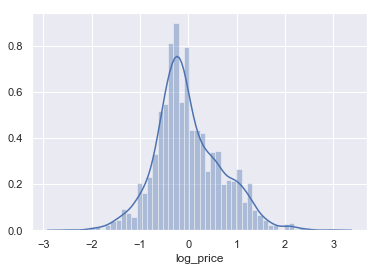

In [217]:
sns.distplot(y1_train-y1_train_pred_linear,bins=50)#The residuals being the estimates of the errors, we will expect them to be normally distributed too

AS CAN BE OBSERVED ABOVE, THE ERROR TERM IS NORMALLY DISTRIBUTED

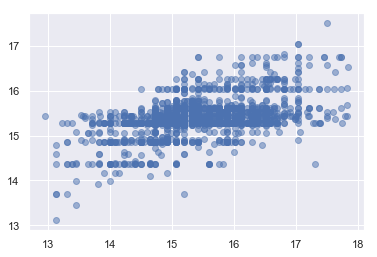

In [224]:
plt.scatter(y1_train,y1_train_pred_linear,alpha=0.5)


THE SCATTER PLOT ABOVE BETWEEN THE ACTUAL VALUES OF Y AND PREDICTED VALUES SHOWS A DEGREE OF LINEARITY WHICH MEANS THE MODEL TRIED TO AN EXTENT..THERE IS A RELATIVELY HIGHER CONCENTRATION OF POINTS IN THE CENTER, WHICH MEANS THE MODEL IS QUITE GOOD AT PREDICTING HOUSE PRICES IN MID-RANGE

LET'S TRY TO CALCULATE THE R-SQUARED-SCORE FOR THE TEST SET

In [222]:
y1_test_pred_linear =  linear_regressor1.predict(x1_test)

In [226]:
sklearn.metrics.r2_score(y1_test,y1_test_pred_linear)

0.21489859793111166

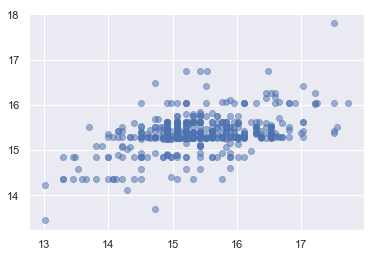

In [225]:
plt.scatter(y1_test,y1_test_pred_linear,alpha=0.5)

The same pattern was observed as in the training set..A higher concentration of points in the center..meaning the model is better at predicting mid-range-prices

AND SO WE HAVE 21.5% ACCURACY ON THE TEST SET COMPARED TO THE 25% ON TRAINING SET..THE DEVIATION IS NOT LARGE..THEREFORE THE MODEL IS NOT OVERFITTING

AT THIS POINT I THINK IT WOULD BE WORTH IT TO CHECK OTHER REGRESSION ALGORITHMS

# SUPER VECTOR REGRESSION

In [213]:
from sklearn.svm import SVR

In [446]:
svr_regressor = SVR(kernel="rbf")

In [447]:
from sklearn.preprocessing import StandardScaler

In [448]:
scaler = StandardScaler()

In [449]:
x1_train_scaled = scaler.fit_transform(x1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [450]:
svr_regressor.fit(x1_train_scaled,y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

NOW LET'S TRY TO PREDICT THE TRAINING SET DATA WITH THE SVR REGRESSOR

In [451]:
svr_regressor.score(x1_train_scaled,y1_train)

0.2292491432791589

NOW LET'S TRY TO PREDICT THE TEST SET DATA WITH THE SVR REGRESSOR

In [454]:
x1_test_scaled = scaler.transform(x1_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [455]:
y1_test_pred_svr = svr_regressor.predict(x1_test_scaled)

In [456]:
sklearn.metrics.r2_score(y1_test,y1_test_pred_svr)

0.16992101933591242

There is clearly overfitting as there is a very significant difference between the train and test set scores

NOW,I'LL USE PARAMETER TUNING WITH GRID SEARCH TO KNOW THE BEST OPTION FOR THE PENALTY PARAMETER, C

In [342]:
from sklearn.model_selection import GridSearchCV

In [463]:
parameters = [{"C":[1,5,7,10,100,1000]}]

In [464]:
grid_search = GridSearchCV(estimator =svr_regressor,param_grid =parameters,cv=10,n_jobs =-1)

In [465]:
grid_search = grid_search.fit(x1_train_scaled,y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [466]:
grid_search.best_params_

{'C': 1}

In [467]:
grid_search.best_score_

0.16636437594663456

ACCORDING TO THE GRID SEARCH OPERATION ABOVE ,THE BEST C PARAMETER IS THE ONE ALREADY IN USE I.E 1..THIS MODEL IS NOT AS GOOD AS THE MULTIPLE LINEAR REGRESSION MODEL USED EARLIER.

# DECISION TREE REGRESSION

In [470]:
from sklearn.tree import DecisionTreeRegressor

In [488]:
dtree_regressor = DecisionTreeRegressor(random_state = 42)

In [489]:
dtree_regressor.fit(x1_train,y1_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [490]:
dtree_regressor.score(x1_train,y1_train)

0.3079013325029083

In [491]:
y1_test_pred_dtree = dtree_regressor.predict(x1_test)

In [492]:
sklearn.metrics.r2_score(y1_test,y1_test_pred_dtree)

0.08871292804685704

THERE IS CLEARLY OVERFITTING..WE WILL TRY GRID SEARCH

In [497]:
parameters1 = [{"max_depth" : [1000,2000],"min_samples_split":[80,90,120,200,500,],"max_leaf_nodes":[1000,2000,3000,5000,8000]}]

grid_search2 = GridSearchCV(estimator = dtree_regressor,param_grid = parameters1, n_jobs=-1,cv=10)

In [498]:
grid_search2 = grid_search2.fit(x1_train,y1_train)

In [499]:
grid_search2.best_score_

0.19652592627835697

In [500]:
grid_search2.best_params_

{'max_depth': 1000, 'max_leaf_nodes': 1000, 'min_samples_split': 120}

NOW LET'S REREUN WITH THE DERIVED PARAMETERS

In [503]:
dtree_regressor2 = DecisionTreeRegressor(max_depth= 1000, max_leaf_nodes= 1000, min_samples_split= 120 ,random_state = 42)

In [504]:
dtree_regressor2.fit(x1_train,y1_train)

DecisionTreeRegressor(criterion='mse', max_depth=1000, max_features=None,
           max_leaf_nodes=1000, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=120, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [505]:
dtree_regressor2.score(x1_train,y1_train)

0.2670017260980717

In [506]:
y1_test_pred_dtree2 = dtree_regressor2.predict(x1_test)

In [507]:
sklearn.metrics.r2_score(y1_test,y1_test_pred_dtree2)

0.17577971947416138

SO..WITH THE DECISION TREE MODEL, WE GOT 26.7% ACCURACY ON TRAINING SET AND 17% ON TEST SET..THIS IS CLEARLY NOT AS GOOD AS THE LINEAR REGRESSION RESULT

# RANDOM FOREST REGRESSION

In [508]:
from sklearn.ensemble import RandomForestRegressor

In [510]:
forest_regressor = RandomForestRegressor(n_estimators=100,criterion='mse')

In [511]:
forest_regressor.fit(x1_train,y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [513]:
forest_regressor.score(x1_train,y1_train)

0.30093645950863546

In [514]:
y1_test_pred_forest = forest_regressor.predict(x1_test)

In [515]:
sklearn.metrics.r2_score(y1_test,y1_test_pred_forest)

0.1601673239161674

AGAIN...THERE IS CLEARLY OVERFITTING..WE WILL TRY PARAMETER TUNING WITH GRID SEARCH

In [523]:
parameters_forest = [{"max_depth" : [1000,2000],"min_samples_split":[80,90,120,200,500,],"max_leaf_nodes":[1000,2000,3000,5000,8000]}]

grid_search_forest = GridSearchCV(estimator = forest_regressor,param_grid = parameters_forest, n_jobs=-1,cv=10)

In [524]:
grid_search_forest = grid_search_forest.fit(x1_train,y1_train)

In [525]:
grid_search_forest.best_score_

0.2063398979967391

In [526]:
grid_search_forest.best_params_

{'max_depth': 1000, 'max_leaf_nodes': 5000, 'min_samples_split': 80}

NOW..LET'S RERUN THE PROCESS WITH THE NEW PARAMETERS

In [527]:
forest_regressor2 = RandomForestRegressor(max_depth=1000, max_leaf_nodes=5000, min_samples_split= 80,n_estimators=100,criterion='mse')

In [528]:
forest_regressor2.fit(x1_train,y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1000,
           max_features='auto', max_leaf_nodes=5000,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=80,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [532]:
forest_regressor2.score(x1_train,y1_train)

0.27316915040546774

In [533]:
y1_test_pred_forest2 = forest_regressor2.predict(x1_test)

In [534]:
sklearn.metrics.r2_score(y1_test,y1_test_pred_forest2)

0.20491105431597678

WITH RANDOM FOREST, WE HAVE AN ACCURACY OF 27% ON TRAINING SET AND 20.49% ON TEST SET..THIS IS THE CLOSEST SO FAR TO THE LINEAR REGRESSION ALGORITHM WITH AN ACCURACY OF 25% ON TRAINING SET AND 21.49% 0N TEST SET

BECAUSE OF THE PERFORMANCE OF THE LINEAR REGRESSION ALGORITHM ON THE TEST SET..I WILL BE SELECTING IT AS THE BEST..

NOW LET'S RUN A CLUSTER ANALYSIS TO SEE IF THERE IS A POSSIBILITY THAT WE MISSED OUT AN IMPORTANT VARIABLE AS THE PREDICTION ACCURACY SEEMS QUITE LOW FOR A HOUSE PRICE MODEL

In [538]:
from sklearn.cluster import KMeans

In [560]:
wcss = []
wcss2=[]
x_clust1 = newer_df4.iloc[:,[2,6]]#Baths and Price
x_clust2 = newer_df4.iloc[:,[4,6]]#Garage and Price

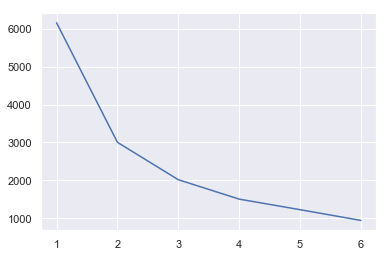

In [561]:
for i in range(1,7):
    kmeans = KMeans(i,init='k-means++')
    kmeans.fit(x_clust1)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
number_clusters=[i for i in range(1,7)]
plt.plot(number_clusters,wcss)

In [567]:
kmeans1 = KMeans(4,init="k-means++")

In [568]:
id_clusters = kmeans1.fit_predict(x_clust1)

In [569]:
x_clust1["clusters"] = id_clusters

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Price')

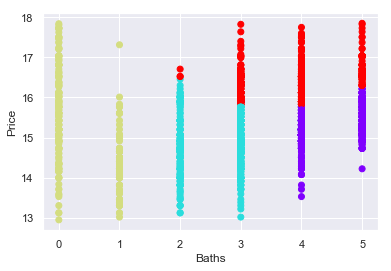

In [570]:
plt.scatter(x_clust1.iloc[:,0],x_clust1.iloc[:,1],c=x_clust1["clusters"],cmap ="rainbow")
plt.xlabel("Baths")
plt.ylabel("Price")

From the cluster plot above,it can be observed that as the baths number increase..even to 4, there is a cluster with significant number of data points at a relatively lower level which means Baths alone is not a strong predictor of Price ..Another factor such as area might be quite important and might influence the price. Even some baths with low numbers such as 0, had a very high price

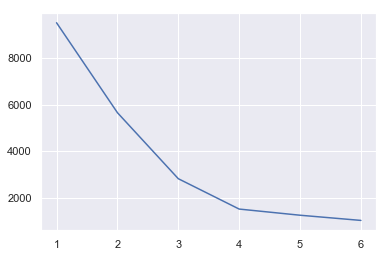

In [571]:
for i in range(1,7):
    kmeans = KMeans(i,init='k-means++')
    kmeans.fit(x_clust1)
    wcss_iter = kmeans.inertia_
    wcss2.append(wcss_iter)
number_clusters=[i for i in range(1,7)]
plt.plot(number_clusters,wcss2)

In [572]:
kmeans2 = KMeans(4,init="k-means++")

In [573]:
id_clusters2 = kmeans2.fit_predict(x_clust2)

In [574]:
x_clust2["clusters"] = id_clusters2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Price')

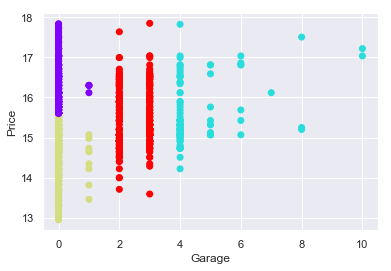

In [576]:
plt.scatter(x_clust2.iloc[:,0],x_clust2.iloc[:,1],c=x_clust2["clusters"],cmap ="rainbow")
plt.xlabel("Garage")
plt.ylabel("Price")

HIGHER NUMBERS OF GARAGES ARE ASSOCIATED WITH RELATIVELY HIGHER PRICES...THIS CAN BE UNDERSTOOD AS THE KIND OF HOUSES SOME RICH PEOPLE BUY E.G THE SENATORS..HOUSES THAT HAVE MANY GARAGES FOR THEIR FLEET OF CARS..BUT LOWER NUMBERS INCLUDING ZERO STILL HAVE HIGH PRICES STIPULATING THAT THERE MIGHT BE ANOTHER VARIABLE E.G AREA OF THE LAND..

THEREFORE THE BEST MODEL SO FAR IS THE LINEAR REGRESSION MODEL WITH AN R-SQUARED OF 25% ON TRAINING DATA AND 21.49% ON TEST DATA